In [1]:
import pandas as pd
import numpy as np
import re
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('D:\M\MATLAB Driver\\forward\Fifty-three\布达拉宫.txt', 'r', encoding='utf-8') as file:
    tiktok_text = file.read()

# 定义正则表达式
# pattern = r'\.\.\.(.*?)\d+(.*?)前·\w+'
# result = re.findall(pattern, tiktok_text, re.DOTALL)
# #删除“作者赞过”这一行
# result = [item for item in result if '作者赞过' not in item[0]]
# #删除“@”所在行
# result = [item for item in result if '@' not in item[0]]
# #删除方框
# #将列表转换为字符串
result=[item[0] for item in tiktok_text]
result = ''.join(result)
# pattern = re.compile(r'\[([^[\]]*)\]')
# result = pattern.sub("", result)
# remove=['耳朵','没有','就是','不是',
#         '现在','一个','这样','四川','重庆','男人',
#         '女人','男朋友','老公','我们','真的',
#         '喜欢','这个',
#         '还是','你们','婆娘','这么','不要'
#         ,'我家','什么','女生','那个','觉得',
#         '但是','不会','这些','可能','一般','还有','怎么','可以','所以']
# for i in remove:
#     result=result.replace(i,'')
# #将result转换为列表
result = result.split('\n')
with open('D:\M\MATLAB Driver\\forward\Fifty-three\布达拉宫整理.txt', 'w', encoding='utf-8') as file:
    file.write(str(result))
    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZhengJi\AppData\Local\Temp\jieba.cache
Loading model cost 0.524 seconds.
Prefix dict has been built successfully.


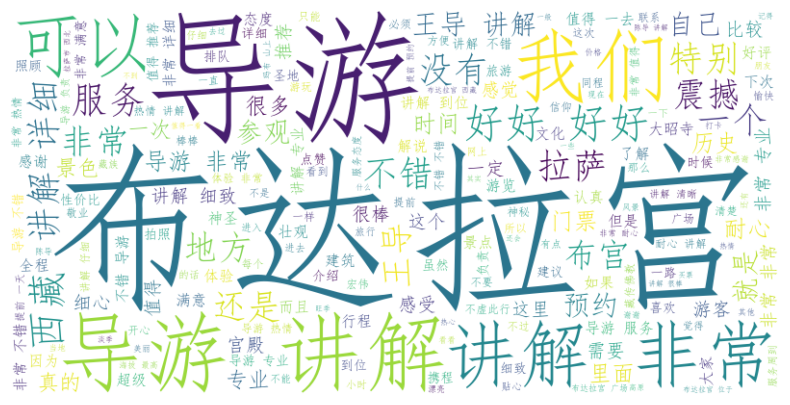

In [2]:
with open('D:\M\MATLAB Driver\\forward\Fifty-three\布达拉宫整理.txt', 'r', encoding='utf-8') as file:
    result = file.read()

# 使用结巴分词对文本进行分词
text_after_replacement = jieba.lcut(result, cut_all=False)

# 删除单个字与长度为1的词
result = [word for word in text_after_replacement if len(word) > 1]

# 将分词后的列表转换为字符串
text_for_wordcloud = ' '.join(result)
from collections import Counter

# 假设text_for_wordcloud是你要计数的文本
words = text_for_wordcloud.split()

# 使用Counter进行计数
word_counts = Counter(words)

# 对计数结果进行排序
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

#导出为csv
word_counts=pd.DataFrame(sorted_word_counts)
word_counts.to_csv('D:\M\MATLAB Driver\\forward\Fifty-three\\bdlg_count.csv',encoding='utf-8-sig')
# 生成词云对象
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('D:\M\MATLAB Driver\\forward\Fifty-three\布达拉宫.png')
plt.show()


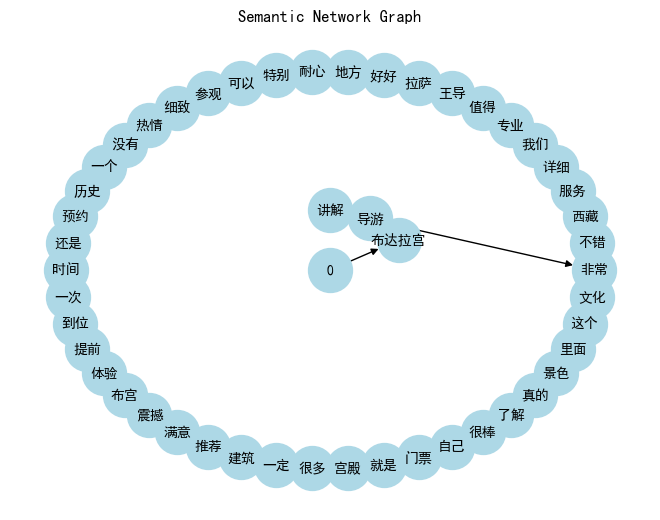

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#chinese support
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 读取 CSV 文件并创建 DataFrame
df = pd.read_csv('bdlg_count.csv', header=None, names=['ID', 'Word', 'Count'])[:50]

# 创建空的有向图
G = nx.DiGraph()

# 添加节点和边
for index, row in df.iterrows():
    G.add_node(row['Word'], count=row['Count'])  # 添加节点并设置属性
    if index > 0:  # 从第二行开始添加边，将前一行词语连接到当前词语
        G.add_edge(df.at[index - 1, 'Word'], row['Word'])

# 设置节点的位置
pos = {}

# 将第一个节点放在图的中间
pos[df.iloc[0]['Word']] = (0, 0)

# 将后面三个节点密集放置在第一个节点周围
angles = [2 * 3.14159 / 12, 4 * 3.14159 / 12, 6 * 3.14159 / 12]
radius = 1.5
for i, angle in enumerate(angles):
    pos[df.iloc[i + 1]['Word']] = (radius * np.cos(angle), radius * np.sin(angle))

# 将后面的节点均匀分布在圆周上
angle_step = 2 * 3.14159 / 46
radius = 5
for i in range(4, len(df)):
    angle = angle_step * (i - 4)
    pos[df.iloc[i]['Word']] = (radius * np.cos(angle), radius * np.sin(angle))

# 绘制语义网络图
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=10)

# 显示图形
plt.title('Semantic Network Graph')
plt.show()
